<a href="https://colab.research.google.com/github/LuisJavierFI/ClusterJerarquico-vs-ClusterParticional/blob/main/Cl%C3%BAster_Jeraruico_vs_Cl%C3%BAster_Particional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clúster Jerárquico vs Clúster Particional**
# **Luis Javier**
## ljfi16xc@gmail.com


### **Importar las bibliotecas y los datos**

In [ ]:
import pandas as pd                         # Para la manipulación y análisis de datos
import numpy as np                          # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt             # Para la generación de gráficas a partir de los datos
import seaborn as sns                       # Para la visualización de datos basado en matplotlib
%matplotlib inline                
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
files.upload()
#from google.colab import drive
#drive.mount('/content/drive')

Saving WDBCOriginal.csv to WDBCOriginal.csv


{'WDBCOriginal.csv': b'\xef\xbb\xbfIDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension\r\nP-842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871\r\nP-842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667\r\nP-84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999\r\nP-84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744\r\nP-84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883\r\nP-843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613\r\nP-844359,M,18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742\r\nP-84458202,M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451\r\nP-844981,M,13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389\r\nP-84501001,M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243\r\nP-845636,M,16.02,23.24,102.7,79

In [ ]:
BCancer = pd.read_csv("WDBCOriginal.csv")
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
BCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDNumber          569 non-null    object 
 1   Diagnosis         569 non-null    object 
 2   Radius            569 non-null    float64
 3   Texture           569 non-null    float64
 4   Perimeter         569 non-null    float64
 5   Area              569 non-null    float64
 6   Smoothness        569 non-null    float64
 7   Compactness       569 non-null    float64
 8   Concavity         569 non-null    float64
 9   ConcavePoints     569 non-null    float64
 10  Symmetry          569 non-null    float64
 11  FractalDimension  569 non-null    float64
dtypes: float64(10), object(2)
memory usage: 53.5+ KB


**Procedimiento PCA**

1. Se hace una estandarización de los datos
2. Se calcula la matriz de covarianzas o correlaciones.
3. Se calculan los componentes (eigen-vectores) y la varianza (eigen-valores).
4. Se decide el número de componentes principales.
5. Se examina la proporción de relevancias –cargas–

#### **Paso 1:** Se hace una estandarización de los datos

In [ ]:
estandarizar = StandardScaler()                                 # Se instancia el objeto StandardScaler 
NuevaMatriz = BCancer.drop(columns=['IDNumber', 'Diagnosis'])   # Se quitan las variables no necesarias (nominales)
estandarizar.fit(NuevaMatriz)                                   # Se calcula la media y desviación para cada variable
MEstandarizada = estandarizar.transform(NuevaMatriz)            # Se estandarizan los datos 

In [ ]:
MEstandarizada.shape

(569, 10)

In [ ]:
pd.DataFrame(MEstandarizada, columns=NuevaMatriz.columns)

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


#### **Pasos 2 y 3:** Se calcula la matriz de covarianzas o correlaciones, y se calculan los componentes (eigen-vectores) y la varianza (eigen-valores)

In [ ]:
pca = PCA(n_components=None)           # Se instancia el objeto PCA, pca=PCA(n_components=None), pca=PCA(.85)
pca.fit(MEstandarizada)                # Se obtiene los componentes
print(pca.components_)

[[ 3.63937928e-01  1.54451129e-01  3.76044342e-01  3.64085847e-01
   2.32480530e-01  3.64442059e-01  3.95748488e-01  4.18038400e-01
   2.15237970e-01  7.18374352e-02]
 [-3.13929073e-01 -1.47180910e-01 -2.84657885e-01 -3.04841714e-01
   4.01962323e-01  2.66013147e-01  1.04285969e-01  7.18360466e-03
   3.68300910e-01  5.71767700e-01]
 [-1.24427590e-01  9.51056591e-01 -1.14083595e-01 -1.23377856e-01
  -1.66532470e-01  5.82778620e-02  4.11464835e-02 -6.85538259e-02
   3.67236467e-02  1.13583953e-01]
 [ 2.95588570e-02  8.91608121e-03  1.34580681e-02  1.34426810e-02
  -1.07802034e-01 -1.85700414e-01 -1.66653518e-01 -7.29839511e-02
   8.92998475e-01 -3.49331792e-01]
 [-3.10670238e-02 -2.19922759e-01 -5.94508289e-03 -1.93412233e-02
  -8.43745291e-01  2.40182964e-01  3.12533253e-01 -9.18019959e-03
   1.12888066e-01  2.64878075e-01]
 [-2.64180151e-01 -3.22065675e-02 -2.37819464e-01 -3.31707451e-01
   6.22253741e-02  5.27109684e-03  6.01467157e-01  2.65613396e-01
  -6.19570070e-02 -5.67918995e-01

#### **Paso 4:** Se decide el número de componentes principales

* Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total.
* Se identifica mediante una gráfica el grupo de componentes con mayor varianza.
* *Se elige las dimensiones cuya varianza sea mayor a 1.

In [ ]:
Varianza = pca.explained_variance_ratio_
print('Porporción de varianza:', Varianza)
print('Varianza acumulada:', sum(Varianza[0:3]))   
#Con 3 componentes se tiene el 88% de varianza acumulada y con 4 el 93%

Porporción de varianza: [5.47858799e-01 2.51871359e-01 8.80615179e-02 4.99009435e-02
 3.72539192e-02 1.24141748e-02 8.00853111e-03 3.48897932e-03
 1.11354606e-03 2.82305886e-05]
Varianza acumulada: 0.8877916754778119


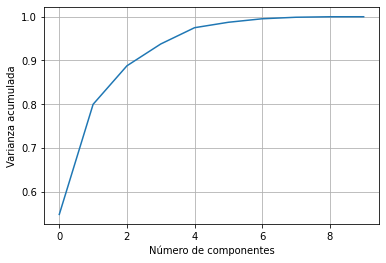

In [ ]:
# Se grafica la varianza acumulada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

#### **Paso 5:** Se examina la proporción de relevancias –cargas–

La importancia de cada variable se refleja en la magnitud de los valores en los componentes (mayor magnitud es sinónimo de mayor importancia).

Se revisan los valores absolutos de los componentes principales seleccionados. Cuanto mayor sea el valor absoluto, más importante es esa variable en el componente principal.

In [ ]:
print(pd.DataFrame(abs(pca.components_)))

          0         1         2  ...         7         8         9
0  0.363938  0.154451  0.376044  ...  0.418038  0.215238  0.071837
1  0.313929  0.147181  0.284658  ...  0.007184  0.368301  0.571768
2  0.124428  0.951057  0.114084  ...  0.068554  0.036724  0.113584
3  0.029559  0.008916  0.013458  ...  0.072984  0.892998  0.349332
4  0.031067  0.219923  0.005945  ...  0.009180  0.112888  0.264878
5  0.264180  0.032207  0.237819  ...  0.265613  0.061957  0.567919
6  0.044188  0.020557  0.083369  ...  0.141313  0.047902  0.345214
7  0.084834  0.007127  0.089259  ...  0.850919  0.016456  0.065259
8  0.474425  0.004213  0.380167  ...  0.022025  0.009068  0.129667
9  0.669071  0.000250  0.740491  ...  0.003748  0.001467  0.007057

[10 rows x 10 columns]


Una forma ad hoc es identificar los valores absolutos más altos. Por ejemplo, para este caso, cargas mayores a 37%.

In [ ]:
CargasComponentes = pd.DataFrame(abs(pca.components_), columns=NuevaMatriz.columns)
CargasComponentes

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,0.363938,0.154451,0.376044,0.364086,0.232481,0.364442,0.395748,0.418038,0.215238,0.071837
1,0.313929,0.147181,0.284658,0.304842,0.401962,0.266013,0.104286,0.007184,0.368301,0.571768
2,0.124428,0.951057,0.114084,0.123378,0.166532,0.058278,0.041146,0.068554,0.036724,0.113584
3,0.029559,0.008916,0.013458,0.013443,0.107802,0.185700,0.166654,0.072984,0.892998,0.349332
4,0.031067,0.219923,0.005945,0.019341,0.843745,0.240183,0.312533,0.009180,0.112888,0.264878
5,0.264180,0.032207,0.237819,0.331707,0.062225,0.005271,0.601467,0.265613,0.061957,0.567919
6,0.044188,0.020557,0.083369,0.261188,0.011292,0.803805,0.367136,0.141313,0.047902,0.345214
7,0.084834,0.007127,0.089259,0.144610,0.170503,0.063980,0.449573,0.850919,0.016456,0.065259
8,0.474425,0.004213,0.380167,0.747347,0.005847,0.218732,0.081171,0.022025,0.009068,0.129667
9,0.669071,0.000250,0.740491,0.032359,0.003690,0.052753,0.010367,0.003748,0.001467,0.007057


In [ ]:
DatosCancer = BCancer.drop(columns=['IDNumber', 'Diagnosis', 'Radius', 'Area', 'Compactness', 'Symmetry'])
DatosCancer

,Texture,Perimeter,Smoothness,Concavity,ConcavePoints,FractalDimension
0,10.38,122.80,0.11840,0.30010,0.14710,0.07871
1,17.77,132.90,0.08474,0.08690,0.07017,0.05667
2,21.25,130.00,0.10960,0.19740,0.12790,0.05999
3,20.38,77.58,0.14250,0.24140,0.10520,0.09744
4,14.34,135.10,0.10030,0.19800,0.10430,0.05883
...,...,...,...,...,...,...
564,22.39,142.00,0.11100,0.24390,0.13890,0.05623
565,28.25,131.20,0.09780,0.14400,0.09791,0.05533
566,28.08,108.30,0.08455,0.09251,0.05302,0.05648
567,29.33,140.10,0.11780,0.35140,0.15200,0.07016


### ***Clustering Jerárquico***

Algoritmo: Ascendente Jerárquico

#### Estandarización de datos

In [ ]:
estandarizar = StandardScaler()
MEstandarizada = estandarizar.fit_transform(DatosCancer)
pd.DataFrame(MEstandarizada)

,0,1,2,3,4,5
0,-2.073335,1.269934,1.568466,2.652874,2.532475,2.255747
1,-0.353632,1.685955,-0.826962,-0.023846,0.548144,-0.868652
2,0.456187,1.566503,0.942210,1.363478,2.037231,-0.398008
3,0.253732,-0.592687,3.283553,1.915897,1.451707,4.910919
4,-1.151816,1.776573,0.280372,1.371011,1.428493,-0.562450
...,...,...,...,...,...,...
564,0.721473,2.060786,1.041842,1.947285,2.320965,-0.931027
565,2.085134,1.615931,0.102458,0.693043,1.263669,-1.058611
566,2.045574,0.672676,-0.840484,0.046588,0.105777,-0.895587
567,2.336457,1.982524,1.525767,3.296944,2.658866,1.043695


#### Algoritmo ascendente jerárquico

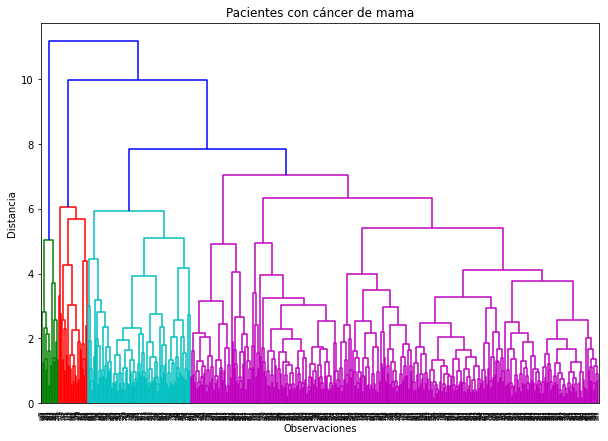

In [ ]:
#Se importan las bibliotecas de clustering jerárquico para crear el árbol
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(10, 7))
plt.title("Pacientes con cáncer de mama")
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
Arbol = shc.dendrogram(shc.linkage(MEstandarizada, method='complete', metric='euclidean'))

In [ ]:
#Se crean las etiquetas de los elementos en los clústeres
MJerarquico = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='euclidean')
MJerarquico.fit_predict(MEstandarizada)
MJerarquico.labels_

array([2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0,
       2, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 1,
       0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 3, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
BCancer['clusterH'] = MJerarquico.labels_
BCancer 

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,2
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,2
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,3


In [ ]:
#Cantidad de elementos en los clusters
BCancer.groupby(['clusterH'])['clusterH'].count() 

clusterH
0    416
1    105
2     30
3     18
Name: clusterH, dtype: int64

In [ ]:
BCancer[BCancer.clusterH == 0]

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH
7,P-84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0
10,P-845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0
11,P-84610002,M,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,0
13,P-846381,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,0
16,P-848406,M,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,P-925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0
560,P-925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0
561,P-925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,0
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0


In [ ]:
CentroidesH = BCancer.groupby('clusterH').mean()
CentroidesH

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
clusterH,,,,,,,,,,
0,12.783293,18.309087,82.359375,518.463702,0.092786,0.082644,0.051333,0.030737,0.174596,0.061853
1,18.406667,22.648286,121.482857,1075.620952,0.100994,0.141507,0.164879,0.092342,0.188855,0.060987
2,12.895633,18.750667,86.129333,531.076667,0.117116,0.195270,0.204140,0.082217,0.221400,0.079053
3,22.278333,23.257778,151.627778,1559.916667,0.117339,0.237433,0.318656,0.160328,0.220967,0.068105


In [ ]:
CentroidesH = BCancer.groupby('clusterH').mean()
CentroidesH

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
clusterH,,,,,,,,,,
0,12.783293,18.309087,82.359375,518.463702,0.092786,0.082644,0.051333,0.030737,0.174596,0.061853
1,18.406667,22.648286,121.482857,1075.620952,0.100994,0.141507,0.164879,0.092342,0.188855,0.060987
2,12.895633,18.750667,86.129333,531.076667,0.117116,0.195270,0.204140,0.082217,0.221400,0.079053
3,22.278333,23.257778,151.627778,1559.916667,0.117339,0.237433,0.318656,0.160328,0.220967,0.068105


### Interpretación

**Clúster 0:** Conformado por 416 pacientes con indicios de cáncer posiblemente maligno por el tamaño del tumor, con un área promedio de tumor de 518 píxeles y una desviación estándar de textura de 12 píxeles. Aparentemente es un tumor compacto (0.08 píxeles), cuya suavidad alcanza 0.09 píxeles, una simetría de 0.17 y una aproximación de frontera, dimensión fractal, promedio de 0.061 píxeles.

**Clúster 2:** Es un grupo formado por 105 pacientes con indicios de cáncer potencialmente maligno, con un área promedio de tumor de 1075 píxeles y una desviación estándar de textura de 22 píxeles. Es un tumor no tan compacto (0.14 píxeles), cuya suavidad alcanza 0.1 píxeles, una simetría de 0.18 y una aproximación de frontera, dimensión fractal, promedio de 0.06 píxeles.

**Clúster 3:** Conformado por 30 pacientes con indicios de cáncer posiblemente maligno por el tamaño del tumor, con un área promedio de tumor de 531 píxeles y una desviación estándar de textura de 18 píxeles. Aparentemente el tumor no es tan compacto (0.19 píxeles), cuya suavidad alcanza 0.11 píxeles, una simetría de 0.22 y una aproximación de frontera, dimensión fractal, promedio de 0.079 píxeles.

**Clúster 4:** Es un grupo formado por 18 pacientes con el máximo tamaño de tumor (potencialmente benigno), con un área promedio de tumor de 1559 píxeles y una desviación estándar de textura de 23 píxeles. No un tumor compacto (0.23 píxeles), cuya suavidad alcanza 0.11 píxeles, una simetría de 0.22 y una aproximación de frontera, dimensión fractal, promedio de 0.068 píxeles.

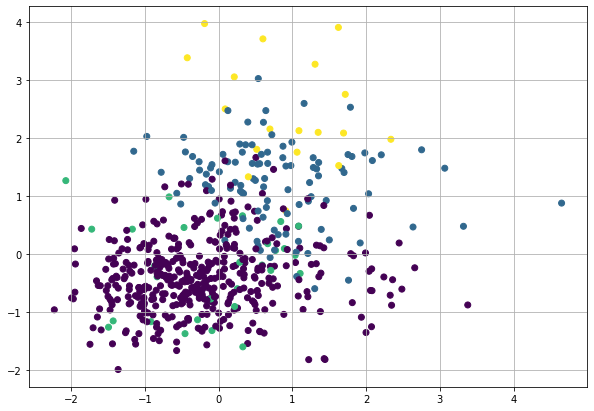

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(MEstandarizada[:,0], MEstandarizada[:,1], c=MJerarquico.labels_)
plt.grid()
plt.show()

### ***Clustering Particional***

Algoritmo: K-means

In [ ]:
#Se importan las bibliotecas
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

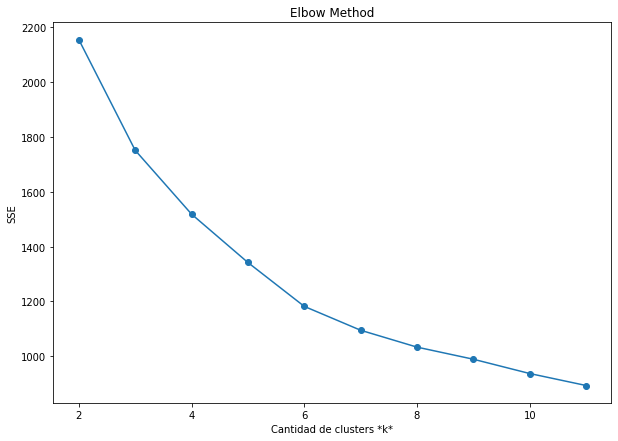

In [ ]:
#Definición de k clusters para K-means
#Se utiliza random_state para inicializar el generador interno de números aleatorios
SSE = []
for i in range(2, 12):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(MEstandarizada)
    SSE.append(km.inertia_)

#Se grafica SSE en función de k
plt.figure(figsize=(10, 7))
plt.plot(range(2, 12), SSE, marker='o')
plt.xlabel('Cantidad de clusters *k*')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

**Observación.** 
En algunas ocasiones puede que no exista un codo afilado (codo agudo) y, como método heurístico, ese "codo" no siempre puede identificarse sin ambigüedades.

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(2, 12), SSE, curve="convex", direction="decreasing")
kl.elbow

6

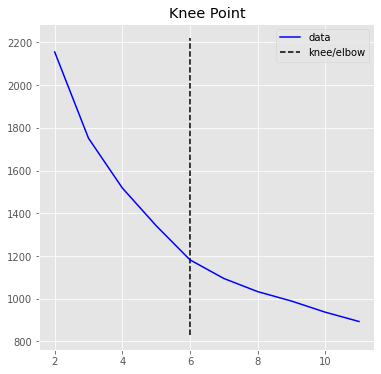

In [ ]:
plt.style.use('ggplot')
kl.plot_knee()

In [ ]:
#Se crean las etiquetas de los elementos en los clusters
MParticional = KMeans(n_clusters=6, random_state=0).fit(MEstandarizada)
MParticional.predict(MEstandarizada)
MParticional.labels_

array([3, 5, 2, 3, 5, 3, 5, 3, 3, 3, 1, 5, 3, 5, 3, 3, 5, 3, 5, 0, 4, 4,
       3, 5, 5, 3, 3, 5, 5, 5, 2, 3, 2, 5, 5, 5, 5, 0, 1, 4, 1, 4, 5, 4,
       1, 5, 0, 3, 4, 1, 1, 0, 0, 5, 1, 0, 5, 3, 0, 4, 4, 4, 3, 0, 3, 3,
       4, 0, 3, 0, 5, 4, 5, 4, 0, 5, 4, 3, 2, 0, 4, 4, 2, 2, 0, 5, 5, 5,
       1, 4, 1, 5, 0, 0, 5, 5, 4, 4, 0, 4, 1, 4, 1, 4, 4, 3, 4, 0, 2, 1,
       4, 4, 3, 4, 4, 1, 4, 3, 3, 5, 0, 5, 2, 4, 0, 0, 1, 5, 3, 2, 4, 5,
       5, 0, 5, 1, 4, 0, 3, 4, 0, 5, 4, 0, 0, 4, 3, 0, 4, 0, 4, 4, 3, 0,
       0, 0, 5, 0, 0, 0, 4, 5, 2, 4, 5, 0, 0, 5, 5, 0, 0, 0, 3, 4, 0, 0,
       4, 5, 1, 0, 2, 2, 5, 0, 1, 0, 5, 0, 0, 0, 3, 1, 0, 1, 3, 0, 3, 5,
       5, 5, 0, 5, 2, 3, 4, 0, 4, 5, 4, 0, 5, 0, 2, 5, 5, 4, 0, 0, 5, 5,
       0, 4, 4, 5, 0, 0, 4, 0, 1, 3, 3, 1, 1, 5, 0, 1, 2, 5, 1, 5, 0, 0,
       4, 1, 5, 4, 0, 0, 1, 4, 2, 0, 2, 5, 5, 4, 5, 3, 3, 5, 5, 1, 5, 0,
       5, 5, 4, 1, 0, 4, 0, 0, 2, 0, 5, 4, 0, 5, 0, 0, 5, 0, 5, 3, 0, 0,
       1, 0, 1, 0, 3, 0, 4, 0, 0, 0, 0, 4, 0, 1, 2,

In [ ]:
BCancer['clusterP'] = MParticional.labels_
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH,clusterP
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,2,3
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1,5
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1,2
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,2,3
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1,2
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1,5
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0,1
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,3,2


In [ ]:
#Cantidad de elementos en los clusters
BCancer.groupby(['clusterP'])['clusterP'].count()

clusterP
0    173
1     80
2     36
3     57
4    120
5    103
Name: clusterP, dtype: int64

In [ ]:
BCancer[BCancer.clusterP == 0]

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH,clusterP
19,P-8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0,0
37,P-854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0,0
46,P-85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0,0
51,P-857373,B,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.017230,0.1353,0.05953,0,0
52,P-857374,B,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.013490,0.1868,0.06110,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,P-91813702,B,12.340,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.026470,0.1689,0.05808,0,0
532,P-91903902,B,13.680,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.018800,0.1631,0.06155,0,0
546,P-922577,B,10.320,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,0,0
547,P-922840,B,10.260,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.024380,0.1669,0.06714,0,0


In [ ]:
CentroidesP = BCancer.groupby('clusterP').mean()
#CentroidesP = BCancer.groupby(['clusterP'])['Texture', 'Area', 'Smoothness', 'Compactness', 'Symetry', 'FractalDimension'].mean()
CentroidesP 

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH
clusterP,,,,,,,,,,,
0,12.656434,16.226936,80.994220,502.523121,0.085962,0.063508,0.033525,0.021465,0.167757,0.059234,0.000000
1,12.546475,24.246125,80.549250,497.178750,0.085041,0.072840,0.043640,0.023600,0.167413,0.060455,0.025000
2,21.640833,22.361389,145.452778,1467.480556,0.111778,0.197050,0.270875,0.142322,0.206114,0.064372,1.944444
3,14.164491,19.889123,94.694211,634.266667,0.113700,0.188542,0.191454,0.086418,0.215146,0.074183,1.280702
4,11.627350,17.056500,75.240833,421.359167,0.105813,0.102454,0.057438,0.033389,0.184725,0.067590,0.050000
5,18.091456,21.780485,118.559903,1032.771845,0.096619,0.120590,0.132804,0.079392,0.182677,0.058170,0.660194


### Interpretación

***Clúster 0:*** Conformado por 103 pacientes con alta probabilidad de tener un tumor benigno (por su tamaño), con un área promedio de tumor de 1032 píxeles y una desviación estándar de textura de 21 píxeles.
Aparentemente es un tumor algo compacto (0.12 píxeles), cuya suavidad alcanza 0.09 píxeles, una simetría de 0.18 y una aproximación de frontera, dimensión fractal, promedio de 0.058 píxeles.

...

***Clúster 5:*** Es un grupo formado por 57 pacientes con un tamaño de tumor regular (potencialmente benigno), con un área promedio de tumor de 634 pixeles y una desviación estándar de textura de 19 pixeles. Es un tumor compacto (0.18 pixeles), cuya suavidad alcanza 0.11 pixeles, una simetría de 0.21 y una aproximación de frontera, dimensión fractal, promedio de 0.074 pixeles.

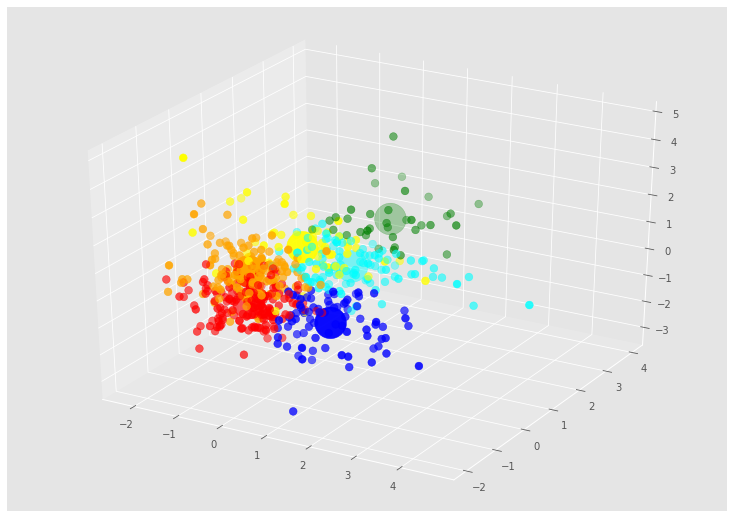

In [ ]:
# Gráfica de los elementos y los centros de los clusters
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')
colores=['red', 'blue', 'green', 'yellow', 'orange', 'cyan']
asignar=[]
for row in MParticional.labels_:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(MEstandarizada[:, 0], 
           MEstandarizada[:, 1], 
           MEstandarizada[:, 2], marker='o', c=asignar, s=60)
ax.scatter(MParticional.cluster_centers_[:, 0], 
           MParticional.cluster_centers_[:, 1], 
           MParticional.cluster_centers_[:, 2], marker='o', c=colores, s=1000)
plt.show()